In [354]:
import pandas as pd
from datetime import datetime
import numpy as np
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt

In [64]:
pd.set_option('display.max_rows', 100)


In [8]:
import sys
from pathlib import Path

root_path = Path.cwd().parent
sys.path.append(str(root_path))


In [9]:
from src.howmanypizzas import read_data

In [20]:
t = read_data.read_registration_data(Path('../data'))

checkins.csv
sf_python_2023_11_15.csv
sf_python_2023_2_8.csv
sf_python_2023_6_14.csv
sf_python_2023_9_13.csv
sf_python_2024_10_9.csv
sf_python_2024_11_13.csv
sf_python_2024_2_21.csv
sf_python_2024_3_13.csv
sf_python_2024_4_10.csv
sf_python_2024_6_12.csv
sf_python_2024_7_10.csv
sf_python_2024_8_14.csv
sf_python_2025_1_8.csv
sf_python_2025_2_12.csv
sf_python_2025_3_12.csv
sf_python_2025_4_9.csv
sf_python_2025_5_14.csv
sf_python_2025_6_11.csv
sf_python_2025_7_16.csv


In [68]:
t2 = read_data.read_checkin_data(Path('../data'), registration_data=t)

Check-in data for 2023-02-08 00:00:00 does not match registration data: 158 check-ins vs 157 registrations.
Check-in data for 2023-06-14 00:00:00 does not match registration data: 121 check-ins vs 119 registrations.
Check-in data for 2023-11-15 00:00:00 does not match registration data: 181 check-ins vs 180 registrations.
Check-in data for 2024-06-12 00:00:00 does not match registration data: 129 check-ins vs 128 registrations.
Check-in data for 2024-10-09 00:00:00 does not match registration data: 66 check-ins vs 58 registrations.
Check-in data for 2024-11-13 00:00:00 does not match registration data: 62 check-ins vs 59 registrations.
Check-in data for 2025-02-12 00:00:00 does not match registration data: 86 check-ins vs 79 registrations.


In [100]:
df_check_in = pd.DataFrame([(k.strftime('%Y-%m-%d'), v) for k, v in t2.items()], columns=['day_of_event', 'check_in_count'])

In [295]:
df_list = []
for k, v in t.items():
    #print(k.strftime('%Y-%m-%d'))
    for i, j in v.items():
        df_list.append({'day_of_event': k.strftime('%Y-%m-%d'),
                'register_day': i.strftime('%Y-%m-%d'),
                'registrations': j})

In [296]:
df_registration = pd.DataFrame(df_list)

In [297]:
df_registration = df_registration.merge(df_check_in, how='left', on='day_of_event')

In [298]:
df_registration.head(30)

,day_of_event,register_day,registrations,check_in_count
0,2023-11-15,2023-10-16,1,89.0
1,2023-11-15,2023-10-19,1,89.0
2,2023-11-15,2023-10-23,2,89.0
3,2023-11-15,2023-10-24,2,89.0
4,2023-11-15,2023-10-25,1,89.0
5,2023-11-15,2023-10-26,1,89.0
6,2023-11-15,2023-10-31,2,89.0
7,2023-11-15,2023-11-01,1,89.0
8,2023-11-15,2023-11-03,19,89.0
9,2023-11-15,2023-11-04,12,89.0


In [299]:
df_registration['register_day'] = pd.to_datetime(df_registration['register_day'])

## Plot the registration trends for each event day

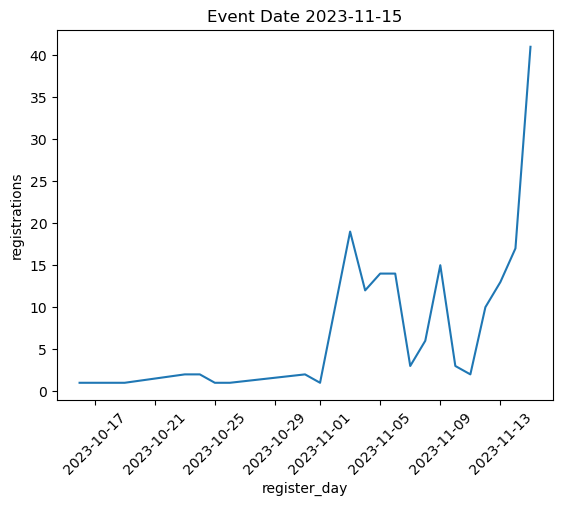

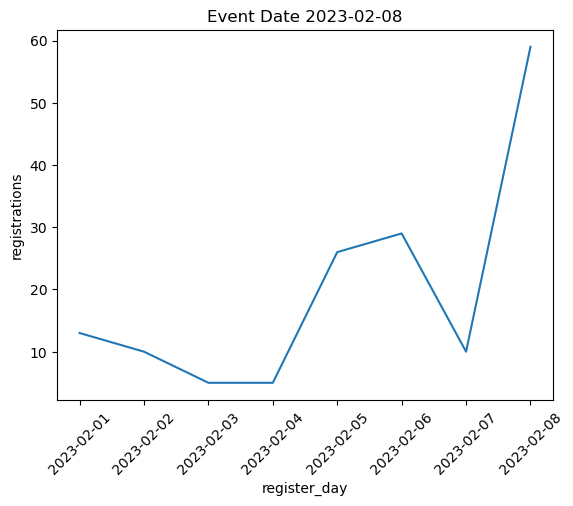

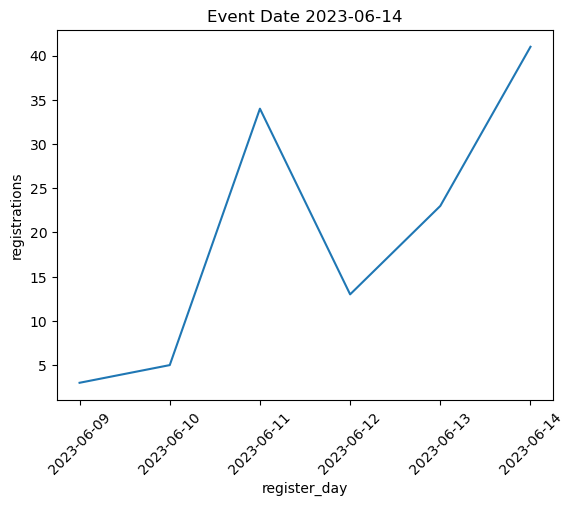

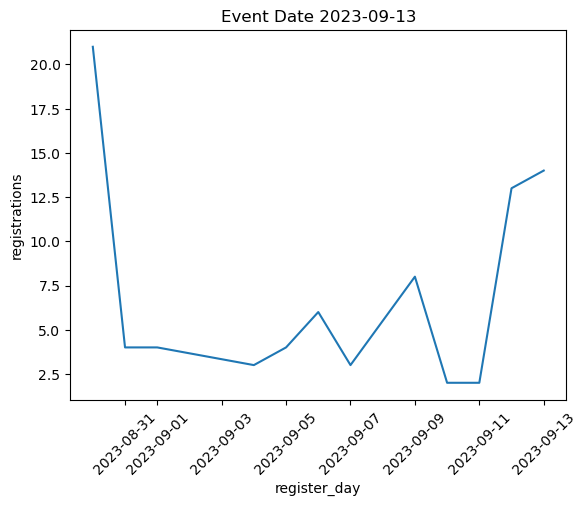

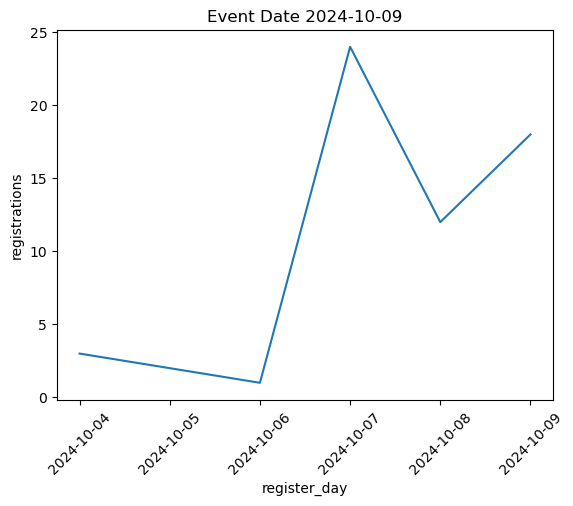

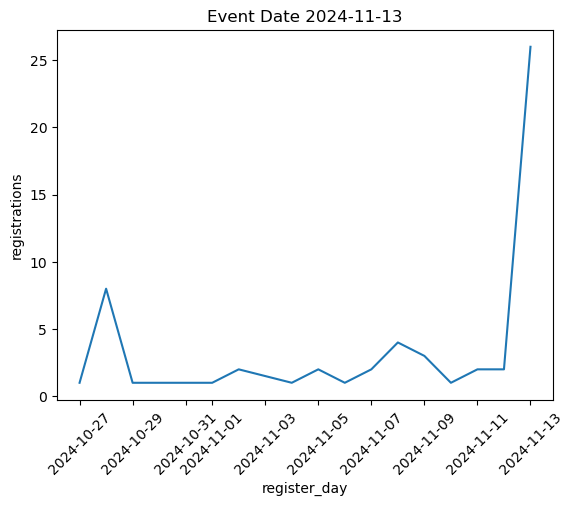

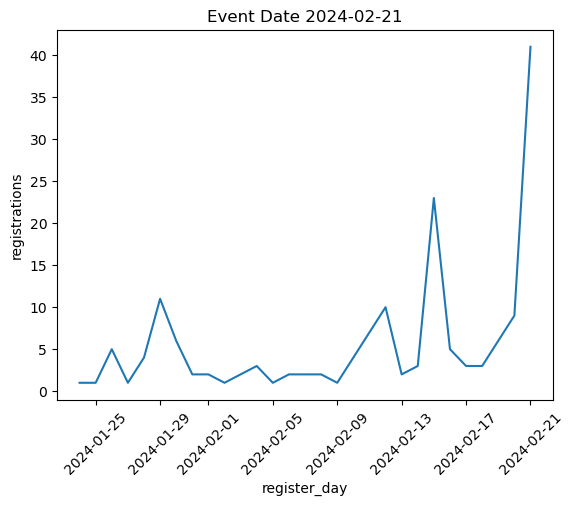

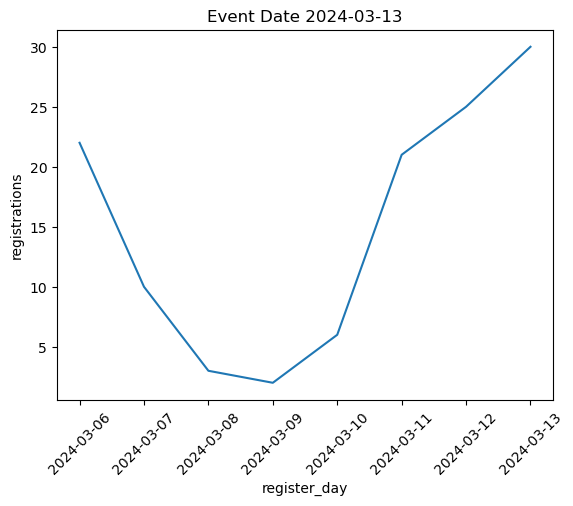

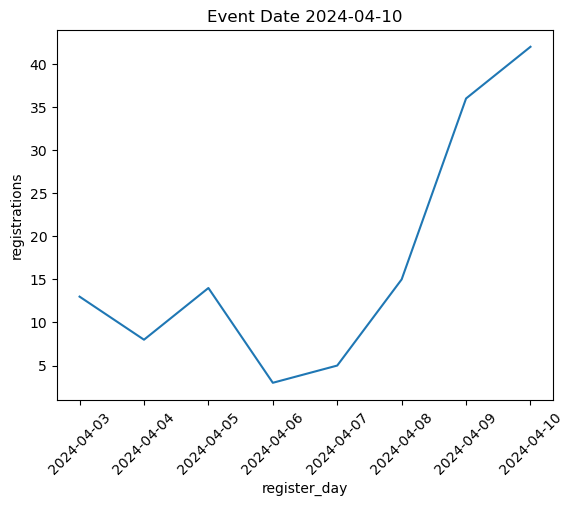

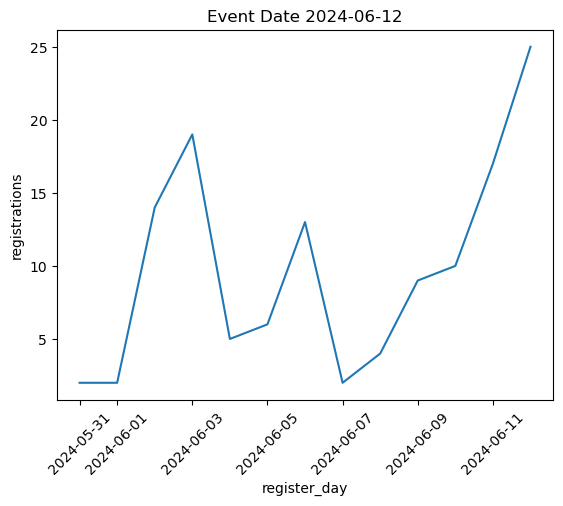

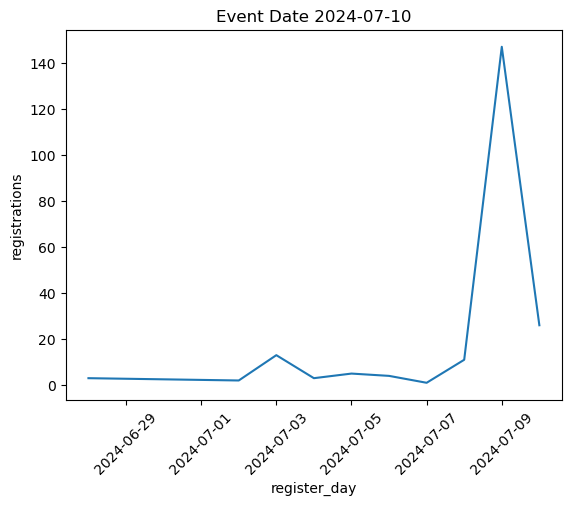

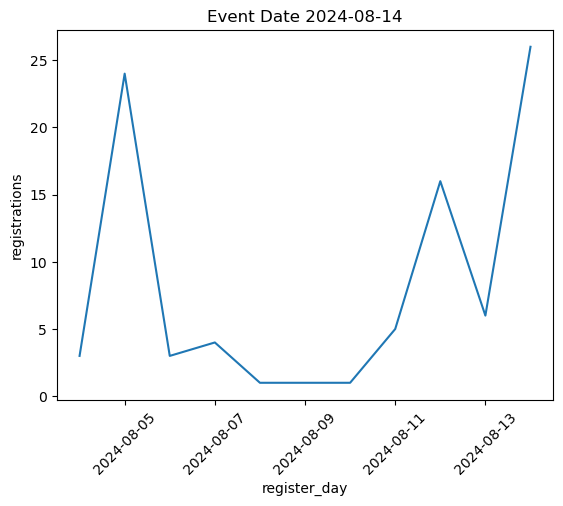

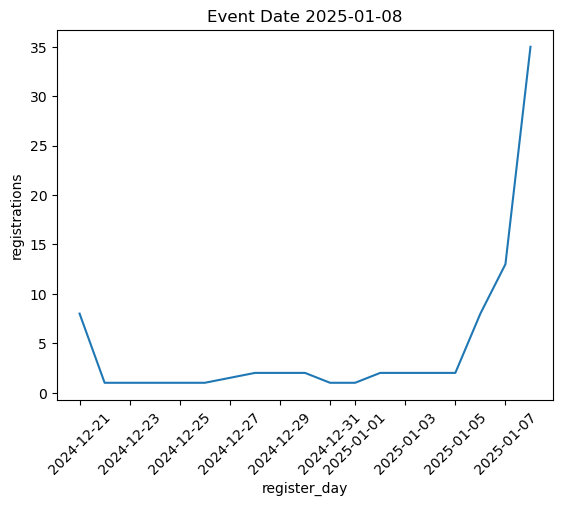

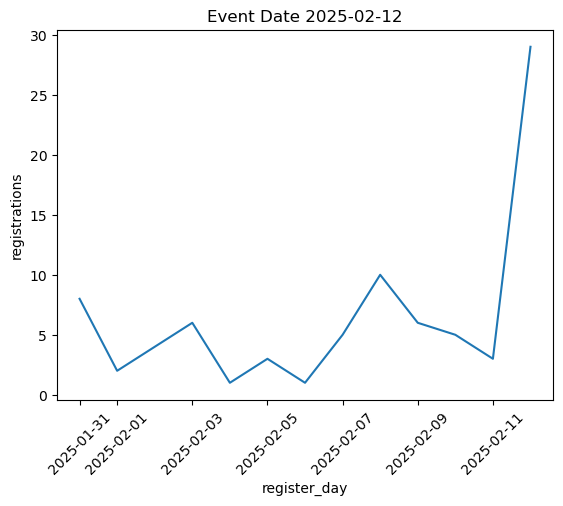

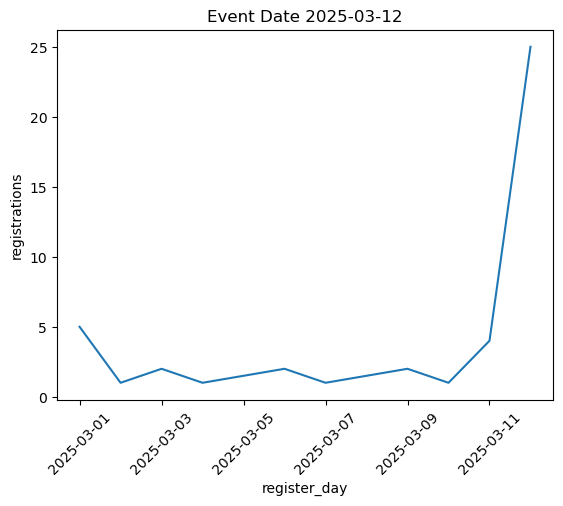

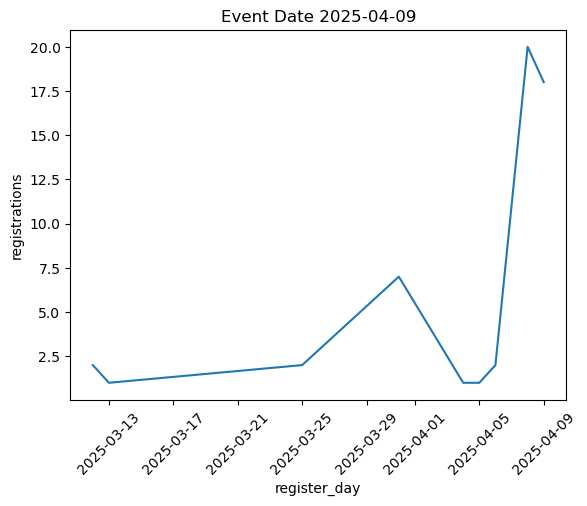

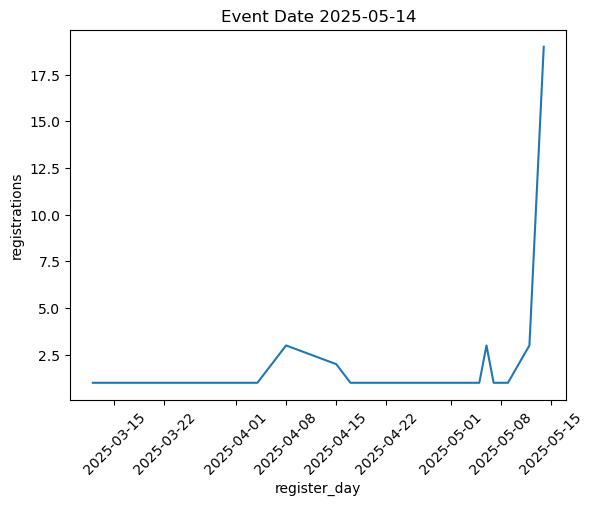

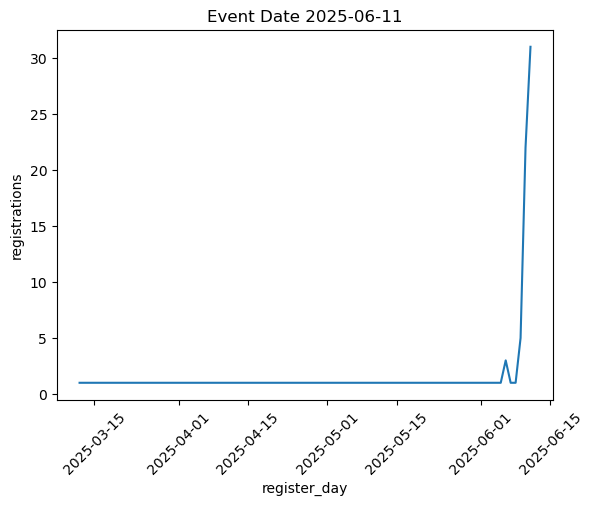

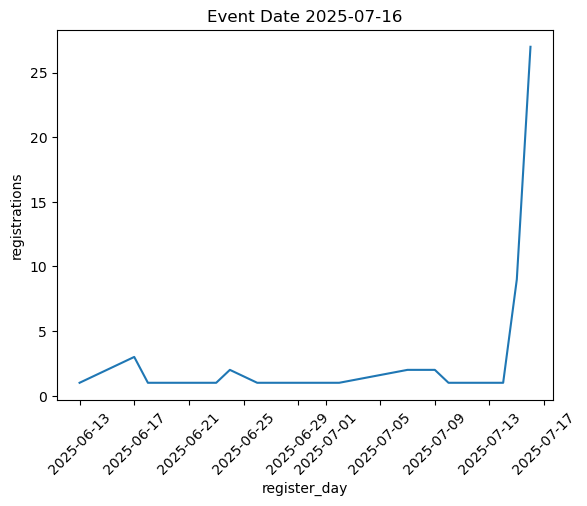

In [182]:
for d in df_registration['day_of_event'].unique():
    fig = sns.lineplot(df_registration[df_registration['day_of_event'] == d], x='register_day', y='registrations')
    fig.set_title('Event Date {}'.format(d))
    plt.xticks(rotation=45)
    #plt.figure(figsize=(15, 10))
    plt.show();

##### Observations: 
- It appears that the more number of days the registration stays open, the larger is the "spike" in registrations in the 3 days preceeding the event
- If there are more "front-loaded" registrations at the start of the window, then the spike isn't as high in the latter days.

### Data Cleaning

In [300]:
df_registration.shape

(240, 4)

In [301]:
df_registration.head()

,day_of_event,register_day,registrations,check_in_count
0,2023-11-15,2023-10-16,1,89.0
1,2023-11-15,2023-10-19,1,89.0
2,2023-11-15,2023-10-23,2,89.0
3,2023-11-15,2023-10-24,2,89.0
4,2023-11-15,2023-10-25,1,89.0


In [302]:
df_registration = df_registration.set_index('day_of_event')

In [303]:
## Check for missing values in each column
df_registration.isnull().sum()

register_day       0
registrations      0
check_in_count    12
dtype: int64

In [304]:
## Missing values
tmp_df_registration_missing = df_registration[df_registration['check_in_count'].isnull()]

In [305]:
## Create a dataframe with imputed check_in_count values from the total registrations
tmp_df_registration_missing = tmp_df_registration_missing.reset_index().drop(columns=['check_in_count']).merge(tmp_df_registration_missing.groupby(level=0)['registrations'].sum().reset_index().rename(columns={'registrations': 'check_in_count'}), how='left', on='day_of_event').set_index('day_of_event')

In [306]:
tmp_df_registration_missing

,register_day,registrations,check_in_count
day_of_event,,,
2023-09-13,2023-08-30,21,84
2023-09-13,2023-08-31,4,84
2023-09-13,2023-09-01,4,84
2023-09-13,2023-09-04,3,84
2023-09-13,2023-09-05,4,84
2023-09-13,2023-09-06,6,84
2023-09-13,2023-09-07,3,84
2023-09-13,2023-09-09,8,84
2023-09-13,2023-09-10,2,84


In [307]:
## Replace missing check-in count rows
df_registration.loc[tmp_df_registration_missing.index.unique()] = tmp_df_registration_missing

In [308]:
df_registration.shape

(240, 3)

In [309]:
df_registration

,register_day,registrations,check_in_count
day_of_event,,,
2023-11-15,2023-10-16,1,89.0
2023-11-15,2023-10-19,1,89.0
2023-11-15,2023-10-23,2,89.0
2023-11-15,2023-10-24,2,89.0
2023-11-15,2023-10-25,1,89.0
...,...,...,...
2025-07-16,2025-07-09,2,48.0
2025-07-16,2025-07-10,1,48.0
2025-07-16,2025-07-14,1,48.0


In [312]:
## Reset index
df_registration = df_registration.reset_index()

In [313]:
df_registration

,day_of_event,register_day,registrations,check_in_count
0,2023-11-15,2023-10-16,1,89.0
1,2023-11-15,2023-10-19,1,89.0
2,2023-11-15,2023-10-23,2,89.0
3,2023-11-15,2023-10-24,2,89.0
4,2023-11-15,2023-10-25,1,89.0
...,...,...,...,...
235,2025-07-16,2025-07-09,2,48.0
236,2025-07-16,2025-07-10,1,48.0
237,2025-07-16,2025-07-14,1,48.0
238,2025-07-16,2025-07-15,9,48.0


### Feature Engineering

- registration_window_length: Difference between the first day and the last day of registration
- total_registrations_pre_2_days: The cumulative sum of registrations as of event date - 2 days
- registration_std_dev_pre_2_days: The standard deviation of registrations until the event date - 2 days

In [314]:
df_registration = df_registration.set_index('day_of_event')

In [315]:
df_registration.head(21)

,register_day,registrations,check_in_count
day_of_event,,,
2023-11-15,2023-10-16,1,89.0
2023-11-15,2023-10-19,1,89.0
2023-11-15,2023-10-23,2,89.0
2023-11-15,2023-10-24,2,89.0
2023-11-15,2023-10-25,1,89.0
2023-11-15,2023-10-26,1,89.0
2023-11-15,2023-10-31,2,89.0
2023-11-15,2023-11-01,1,89.0
2023-11-15,2023-11-03,19,89.0


In [316]:
df_registration_pre_2_days_exclude = df_registration.groupby(level=0).tail(2)
df_registration_pre_2_days_exclude = df_registration[~df_registration['register_day'].isin(df_registration_pre_2_days_exclude['register_day'])]

In [317]:
df_registration_pre_2_days_exclude

,register_day,registrations,check_in_count
day_of_event,,,
2023-11-15,2023-10-16,1,89.0
2023-11-15,2023-10-19,1,89.0
2023-11-15,2023-10-23,2,89.0
2023-11-15,2023-10-24,2,89.0
2023-11-15,2023-10-25,1,89.0
...,...,...,...
2025-07-16,2025-07-07,2,48.0
2025-07-16,2025-07-08,2,48.0
2025-07-16,2025-07-09,2,48.0


In [318]:
df_registration_pre_2_days_exclude_std_dev = df_registration_pre_2_days_exclude.groupby(level=0)['registrations'].std()
df_registration_pre_2_days_exclude_sum = df_registration_pre_2_days_exclude.groupby(level=0)['registrations'].sum()

In [319]:
df_registration_pre_2_days_exclude_std_dev

day_of_event
2023-02-08    10.443499
2023-06-14    14.174508
2023-09-13     5.677441
2023-11-15     6.158245
2024-02-21     4.919510
2024-03-13     8.846845
2024-04-10     5.046451
2024-06-12     5.688905
2024-07-10     4.367085
2024-08-14     8.063980
2024-10-09    12.741010
2024-11-13     1.869556
2025-01-08     2.503843
2025-02-12     2.983287
2025-03-12     1.356203
2025-04-09     2.338090
2025-05-14     0.744946
2025-06-11     1.243163
2025-07-16     0.632456
Name: registrations, dtype: float64

In [320]:
df_registration_pre_2_days_exclude_sum

day_of_event
2023-02-08     88
2023-06-14     55
2023-09-13     57
2023-11-15    122
2024-02-21     98
2024-03-13     64
2024-04-10     58
2024-06-12     86
2024-07-10     42
2024-08-14     58
2024-10-09     28
2024-11-13     31
2025-01-08     32
2025-02-12     47
2025-03-12     15
2025-04-09     14
2025-05-14     19
2025-06-11     18
2025-07-16     21
Name: registrations, dtype: int64

In [321]:
df_registration_min_max = df_registration.groupby(level=0).agg(min_register_day=('register_day', 'min'), max_register_day=('register_day', 'max'))
df_registration_min_max['registration_window_length'] = df_registration_min_max['max_register_day'] - df_registration_min_max['min_register_day']
df_registration_min_max = df_registration_min_max['registration_window_length'].dt.days

In [322]:
df_registration_min_max

day_of_event
2023-02-08     7
2023-06-14     5
2023-09-13    14
2023-11-15    30
2024-02-21    28
2024-03-13     7
2024-04-10     7
2024-06-12    12
2024-07-10    12
2024-08-14    10
2024-10-09     5
2024-11-13    17
2025-01-08    18
2025-02-12    12
2025-03-12    11
2025-04-09    28
2025-05-14    63
2025-06-11    91
2025-07-16    33
Name: registration_window_length, dtype: int64

In [323]:
df_registration.groupby(level=0)['check_in_count'].max()

day_of_event
2023-02-08    81.0
2023-06-14    64.0
2023-09-13    84.0
2023-11-15    89.0
2024-02-21    85.0
2024-03-13    72.0
2024-04-10    84.0
2024-06-12    65.0
2024-07-10    73.0
2024-08-14    44.0
2024-10-09    33.0
2024-11-13    38.0
2025-01-08    50.0
2025-02-12    46.0
2025-03-12    29.0
2025-04-09    33.0
2025-05-14    28.0
2025-06-11    49.0
2025-07-16    48.0
Name: check_in_count, dtype: float64

#### Create the model dataset
- check_in_count: Dependent variable
- registration_window_length: Independent variable
- pre_2_days_registrations_sum: Independent variable
- pre_2_days_registrations_std: Independent variable

In [340]:
df_model_data=pd.DataFrame(df_registration.groupby(level=0)['check_in_count'].max()).merge(pd.DataFrame(df_registration_min_max), left_index=True, right_index=True, how='left').merge(pd.DataFrame(df_registration_pre_2_days_exclude_sum), left_index=True, right_index=True, how='left').\
    merge(pd.DataFrame(df_registration_pre_2_days_exclude_std_dev), left_index=True, right_index=True, how='left').rename(columns={'registrations_x': 'pre_2_days_registrations_sum', 'registrations_y': 'pre_2_days_registrations_std'})

In [345]:
df_model_data

,check_in_count,registration_window_length,pre_2_days_registrations_sum,pre_2_days_registrations_std
day_of_event,,,,
2023-02-08,81.0,7,88,10.443499
2023-06-14,64.0,5,55,14.174508
2023-09-13,84.0,14,57,5.677441
2023-11-15,89.0,30,122,6.158245
2024-02-21,85.0,28,98,4.919510
2024-03-13,72.0,7,64,8.846845
2024-04-10,84.0,7,58,5.046451
2024-06-12,65.0,12,86,5.688905
2024-07-10,73.0,12,42,4.367085


,registration_window_length,pre_2_days_registrations_sum,pre_2_days_registrations_std
day_of_event,,,
2023-02-08,7,88,10.443499
2023-06-14,5,55,14.174508
2023-09-13,14,57,5.677441
2023-11-15,30,122,6.158245
2024-02-21,28,98,4.919510
2024-03-13,7,64,8.846845
2024-04-10,7,58,5.046451
2024-06-12,12,86,5.688905
2024-07-10,12,42,4.367085


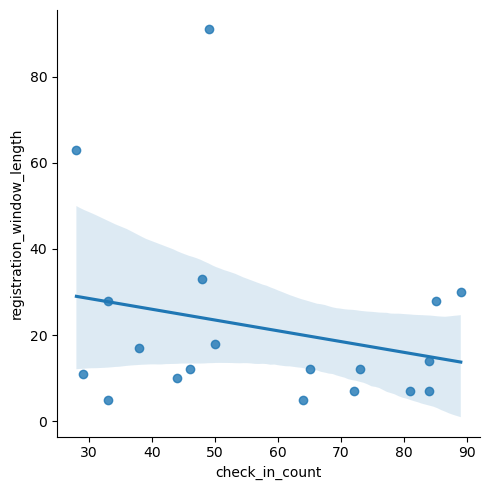

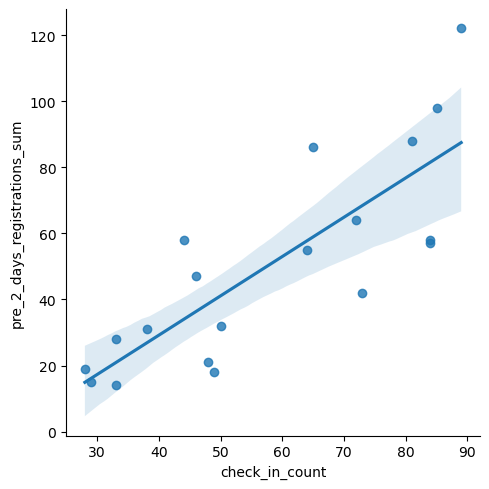

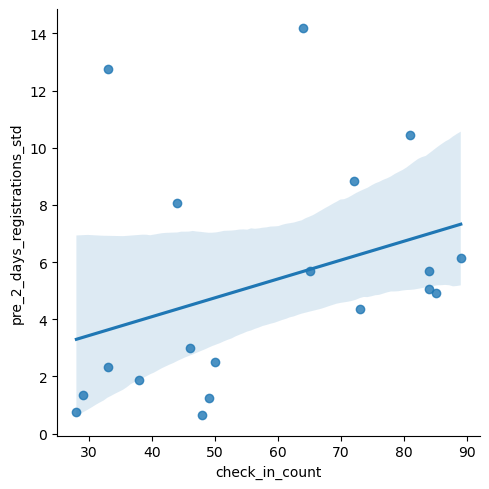

In [353]:
for iv in df_model_data.drop(columns=['check_in_count']).columns.unique():
    fig = sns.lmplot(df_model_data, x='check_in_count', y = iv)
    plt.show()

### Train a simple Logistic Regression model

##### Create X and Y

In [357]:
X = df_model_data.drop(columns='check_in_count')
y = df_model_data['check_in_count']

In [361]:
X = sm.add_constant(X)

In [363]:
y

day_of_event
2023-02-08    81.0
2023-06-14    64.0
2023-09-13    84.0
2023-11-15    89.0
2024-02-21    85.0
2024-03-13    72.0
2024-04-10    84.0
2024-06-12    65.0
2024-07-10    73.0
2024-08-14    44.0
2024-10-09    33.0
2024-11-13    38.0
2025-01-08    50.0
2025-02-12    46.0
2025-03-12    29.0
2025-04-09    33.0
2025-05-14    28.0
2025-06-11    49.0
2025-07-16    48.0
Name: check_in_count, dtype: float64

In [368]:
lr_model = sm.OLS(y, X)
results = lr_model.fit()

In [371]:
results.summary()

/opt/anaconda3/lib/python3.12/site-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=19
  res = hypotest_fun_out(*samples, **kwds)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         check_in_count   R-squared:                       0.661
Model:                            OLS   Adj. R-squared:                  0.594
Method:                 Least Squares   F-statistic:                     9.766
Date:                Sat, 23 Aug 2025   Prob (F-statistic):           0.000806
Time:                        20:45:03   Log-Likelihood:                -74.138
No. Observations:                  19   AIC:                             156.3
Df Residuals:                      15   BIC:                             160.1
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                           30.2891      9.291      3.260      0.005      10.486      50.092
registration_window_length      -0.0096      0.174     -0.055      0.957      -0.381       0.362
pre_2_days_registrations_sum     0.5599      0.115      4.878      0.000       0.315       0.804
pre_2_days_registrations_std    -0.1014      1.009     -0.100      0.921      -2.253       2.050
==============================================================================
Omnibus:                        1.642   Durbin-Watson:                   2.282
Prob(Omnibus):                  0.440   Jarque-Bera (JB):                1.348
Skew:                           0.504   Prob(JB):                        0.510
Kurtosis:                       2.172   Cond. No.                         184.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [379]:
lr_model2 = sm.OLS(y, X[['const', 'pre_2_days_registrations_std', 'pre_2_days_registrations_sum']])
results2 = lr_model2.fit()
results2.summary()

/opt/anaconda3/lib/python3.12/site-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=19
  res = hypotest_fun_out(*samples, **kwds)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         check_in_count   R-squared:                       0.661
Model:                            OLS   Adj. R-squared:                  0.619
Method:                 Least Squares   F-statistic:                     15.62
Date:                Sat, 23 Aug 2025   Prob (F-statistic):           0.000173
Time:                        20:48:48   Log-Likelihood:                -74.140
No. Observations:                  19   AIC:                             154.3
Df Residuals:                      16   BIC:                             157.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                           29.9180      6.163      4.855      0.000      16.854      42.982
pre_2_days_registrations_std    -0.0743      0.852     -0.087      0.932      -1.881       1.733
pre_2_days_registrations_sum     0.5603      0.111      5.055      0.000       0.325       0.795
==============================================================================
Omnibus:                        1.620   Durbin-Watson:                   2.290
Prob(Omnibus):                  0.445   Jarque-Bera (JB):                1.348
Skew:                           0.514   Prob(JB):                        0.510
Kurtosis:                       2.196   Cond. No.                         121.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [381]:
lr_model3 = sm.OLS(y, X[['const', 'pre_2_days_registrations_sum']])
results3 = lr_model3.fit()
results3.summary()

/opt/anaconda3/lib/python3.12/site-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=19
  res = hypotest_fun_out(*samples, **kwds)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         check_in_count   R-squared:                       0.661
Model:                            OLS   Adj. R-squared:                  0.641
Method:                 Least Squares   F-statistic:                     33.17
Date:                Sat, 23 Aug 2025   Prob (F-statistic):           2.31e-05
Time:                        20:50:51   Log-Likelihood:                -74.145
No. Observations:                  19   AIC:                             152.3
Df Residuals:                      17   BIC:                             154.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                           29.7414      5.648      5.266      0.000      17.826      41.657
pre_2_days_registrations_sum     0.5560      0.097      5.759      0.000       0.352       0.760
==============================================================================
Omnibus:                        1.577   Durbin-Watson:                   2.292
Prob(Omnibus):                  0.454   Jarque-Bera (JB):                1.327
Skew:                           0.514   Prob(JB):                        0.515
Kurtosis:                       2.212   Cond. No.                         114.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Interpretation:
- Using pre_2_days_registrations_sum appears to be sufficient for our use-case, but the theoretical model of what affects check-ins might still benefit from using the other features (when we have more data)
- Adding a constant makes sense because even if we have 0 registrations 2 days before an event, it makes intuitive sense that some people would still show up. In the case of our model, that number is ~30 check-ins.
- In conclusion, using pre_2_days_registrations_sum should be sufficient

#### Residuals vs Fitted plot

In [418]:
tmp_predictions = pd.DataFrame(results3.predict(X[['const', 'pre_2_days_registrations_sum']])).rename(columns={0: 'predicted_check_in'})

In [419]:
tmp_predictions['actual_check_in'] = y
tmp_predictions['residuals'] = tmp_predictions['predicted_check_in'] - tmp_predictions['actual_check_in']

<Axes: xlabel='predicted_check_in', ylabel='residuals'>

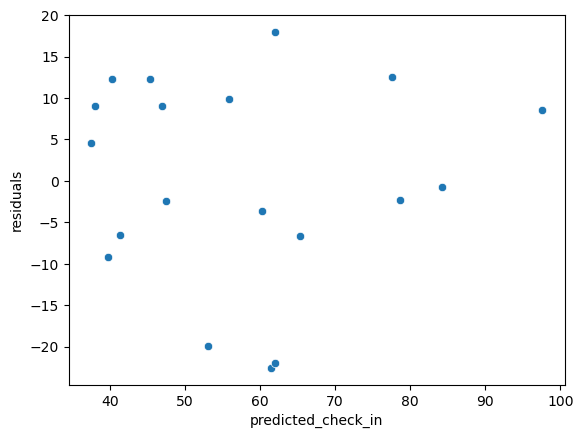

In [ ]:
sns.scatterplot(data=tmp_predictions, x='predicted_check_in', y='residuals')

#### Observation:
- The residuals look randomly distributed, so the model is a good fit

### Save the model

In [423]:
results3.save('../src/howmanypizzas/models/ols_model_v1.pickle')